<a href="https://colab.research.google.com/github/khushu-cs/ml-projects/blob/main/Credit_Card_Fraud_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## * MODEL NAME:CREDIT CARD FRAUD PREDICTION.
      

*   LEARNING OBJECTIVES.

        1.CHECK FOR UNUSUAL PATTERNS.
        2.TO PREDICT WHETHER THE FRAUD WILL OCCUR OR NOT.



## IMPORTING DEPENDENCIES

In [4]:
import numpy as np


In [5]:
import pandas as pd

## IMPORT DATASET

In [17]:
crd=pd.read_csv('/content/creditcard2.csv')

In [18]:
crd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    299 non-null    int64  
 1   V1      299 non-null    float64
 2   V2      299 non-null    float64
 3   V3      299 non-null    float64
 4   V4      299 non-null    float64
 5   V5      299 non-null    float64
 6   V6      299 non-null    float64
 7   V7      299 non-null    float64
 8   V8      299 non-null    float64
 9   V9      299 non-null    float64
 10  V10     299 non-null    float64
 11  V11     299 non-null    float64
 12  V12     299 non-null    float64
 13  V13     299 non-null    float64
 14  V14     299 non-null    float64
 15  V15     299 non-null    float64
 16  V16     299 non-null    float64
 17  V17     299 non-null    float64
 18  V18     299 non-null    float64
 19  V19     299 non-null    float64
 20  V20     299 non-null    float64
 21  V21     299 non-null    float64
 22  V2

In [20]:
crd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,100.317726,-0.255267,0.181887,0.814675,0.347017,0.029449,0.394148,0.162246,-0.014487,0.033753,...,0.032346,-0.072604,-0.040694,0.000223,0.126073,-0.001660,0.018701,-0.024419,85.797425,0.073579
std,59.992025,1.459510,1.373938,1.076761,1.296537,1.287189,1.380512,0.870648,0.726132,0.851446,...,0.516600,0.647410,0.419552,0.666571,0.426036,0.486053,0.370617,0.300427,272.145342,0.261522
min,0.000000,-6.093248,-12.114213,-5.694973,-4.515824,-6.631951,-2.145673,-3.391184,-4.044724,-2.094011,...,-1.045961,-2.776923,-3.553381,-1.735297,-1.389079,-1.243924,-2.377933,-1.648553,0.750000,0.000000
25%,48.500000,-0.927523,-0.183918,0.214784,-0.442262,-0.614555,-0.499897,-0.268613,-0.188610,-0.436385,...,-0.208817,-0.547563,-0.169979,-0.424823,-0.110491,-0.313703,-0.061091,-0.040536,6.140000,0.000000
50%,93.000000,-0.365532,0.258858,0.828613,0.474084,-0.058032,0.062291,0.107712,0.048456,-0.069728,...,-0.040513,-0.047158,-0.055449,0.104744,0.136318,-0.091242,0.016371,0.021078,20.220000,0.000000
75%,146.000000,1.106141,0.873892,1.475055,1.177551,0.454950,0.619268,0.613050,0.285980,0.387000,...,0.111598,0.350195,0.082082,0.434399,0.456319,0.200898,0.093561,0.084300,68.870000,0.000000
max,213.000000,1.492936,5.267376,3.772857,4.075817,7.672544,5.122103,4.808426,1.726413,4.324752,...,3.844729,1.461535,2.458589,1.215279,1.136720,3.065576,2.490503,1.575380,3828.040000,1.000000


In [21]:
crd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
294,209,-0.429224,0.698849,1.588982,1.297157,0.119331,0.214133,0.387461,0.276524,-0.483148,...,0.073325,0.324849,-0.102068,0.214137,-0.251234,-0.267044,0.169115,0.133832,13.99,1
295,210,1.293927,0.338071,-0.042759,0.502134,0.072283,-0.583458,0.123779,-0.187468,0.001883,...,-0.329233,-0.942139,0.008264,-0.492104,0.342975,0.143926,-0.022441,0.025373,12.99,0
296,211,0.263523,-1.812897,-0.311087,0.412930,-0.794605,0.196365,0.416626,-0.062991,0.345392,...,0.002672,-1.042342,-0.480538,-0.414743,0.111706,0.819590,-0.168906,0.078203,526.96,0
297,211,-0.247827,-0.282682,1.653354,-1.014865,-0.680433,0.886364,-0.538201,0.377970,-1.230879,...,0.545696,1.400962,-0.133992,-0.810782,-0.348544,0.093031,0.165626,0.130422,70.00,0
298,213,-0.263380,0.959103,0.285740,0.604068,3.228820,3.799503,0.715285,0.429148,-1.155492,...,-0.015245,0.059111,-0.291825,0.992903,-0.128938,-0.111063,-0.340206,-0.310297,4.38,0


In [22]:
crd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
crd['Class'].value_counts()

0    277
1     22
Name: Class, dtype: int64

# DATA VISUALIZATION

<Axes: >

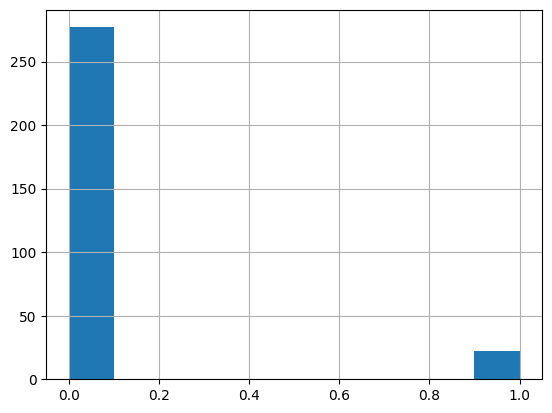

In [68]:
crd['Class'].hist()

# THIS DATASET IS HIGHLY UNBALANCED.

0 --> NORMAL TRANSACTION

1 --> FRAUDULENT TRANSACTION.

In [24]:
leg=crd[crd.Class == 0]
fraud=crd[crd.Class == 1]

In [25]:
leg.shape,fraud.shape

((277, 31), (22, 31))

In [26]:
leg.Amount.describe()

count     277.000000
mean       89.031047
std       281.981296
min         0.750000
25%         6.140000
50%        20.700000
75%        68.740000
max      3828.040000
Name: Amount, dtype: float64

In [27]:
fraud.Amount.describe()

count     22.000000
mean      45.083182
std       63.890820
min        0.890000
25%        6.720000
50%       14.960000
75%       68.060000
max      231.710000
Name: Amount, dtype: float64

In [29]:
crd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,100.718412,-0.282988,0.169171,0.796728,0.342319,0.029808,0.421655,0.154647,-0.018633,0.061981,...,0.056441,0.040181,-0.070269,-0.038921,-0.006363,0.131046,-0.006537,0.021705,-0.027261,89.031047
1,95.272727,0.093758,0.341987,1.040645,0.406165,0.024926,0.047815,0.257923,0.037708,-0.321665,...,0.008270,-0.066299,-0.102007,-0.063015,0.083151,0.063458,0.059749,-0.019132,0.011367,45.083182


In [30]:
leg_sample = leg.sample(n=22)

In [31]:
new_dataset= pd.concat([leg_sample,fraud],axis=0)

In [32]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
163,103,1.245744,0.438878,0.316140,1.107634,-0.178446,-0.941091,0.286291,-0.290079,-0.169188,...,0.038621,0.208207,-0.111479,0.419907,0.722345,-0.331446,0.020337,0.022443,4.19,0
282,200,-1.269461,-1.027153,2.261373,-0.504356,0.693421,1.237761,0.056065,0.091919,-0.676680,...,-0.131777,0.697266,0.288501,-0.644487,0.027409,-0.329714,-0.291795,-0.381556,79.00,0
177,114,1.194066,-0.072582,0.635286,0.768616,-0.735584,-0.673466,-0.146299,-0.065653,0.646048,...,-0.300561,-0.770991,0.074444,0.397713,0.285947,0.286760,-0.031033,0.017052,23.88,0
290,209,-5.852465,5.267376,-1.761895,-1.441250,-0.988529,-0.672187,0.075760,0.774198,3.580112,...,-0.910910,-1.204988,0.215766,-0.498066,1.125918,0.201450,2.468867,1.573084,8.97,0
267,190,-0.913600,0.162262,0.541429,-1.931799,0.235402,-0.209263,0.770523,-0.407195,-1.374754,...,-0.382552,-0.546739,-0.320022,-0.928385,-0.080009,0.908687,-0.286881,0.140450,99.95,0


In [33]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
254,179,-0.431092,0.890752,1.720543,-0.238246,0.273263,-0.970191,1.249910,-0.483676,-0.871157,...,-0.412644,-1.112005,-0.057684,0.430112,-0.063250,0.723811,-0.210697,-0.161058,27.99,1
265,188,1.168433,0.319978,0.589693,1.044774,-0.376942,-0.677335,0.054472,-0.087670,-0.304110,...,0.020051,0.066970,-0.017274,0.532429,0.502070,-0.470804,0.021893,0.019337,8.09,1
278,199,-0.923892,0.568852,1.244236,-0.597473,1.084897,-0.376976,0.568215,-0.009272,-0.246538,...,-0.215560,-0.433264,-0.083938,-0.363649,-0.599897,-0.114448,0.101575,-0.033302,6.45,1
293,209,-0.572011,0.374981,0.923823,-0.954006,0.753635,0.139495,1.450748,-0.551716,-0.126159,...,-0.030324,0.334779,-0.192455,-0.790313,0.110173,0.309765,-0.504723,-0.498287,95.56,1
294,209,-0.429224,0.698849,1.588982,1.297157,0.119331,0.214133,0.387461,0.276524,-0.483148,...,0.073325,0.324849,-0.102068,0.214137,-0.251234,-0.267044,0.169115,0.133832,13.99,1


In [34]:
new_dataset['Class'].value_counts()

0    22
1    22
Name: Class, dtype: int64

In [35]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,117.090909,-0.662889,0.162088,0.600345,-0.228017,0.236970,0.425579,-0.189121,0.245195,0.312105,...,0.105395,-0.067740,-0.184159,0.003425,0.081571,0.154983,0.061935,0.076990,0.053236,54.984091
1,95.272727,0.093758,0.341987,1.040645,0.406165,0.024926,0.047815,0.257923,0.037708,-0.321665,...,0.008270,-0.066299,-0.102007,-0.063015,0.083151,0.063458,0.059749,-0.019132,0.011367,45.083182


SPLITTING DATA INTO FEATURES AND TARGETS.

In [38]:
X = new_dataset.drop(columns = 'Class',axis=1)
Y = new_dataset['Class']

In [37]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
163,103,1.245744,0.438878,0.316140,1.107634,-0.178446,-0.941091,0.286291,-0.290079,-0.169188,...,-0.079776,0.038621,0.208207,-0.111479,0.419907,0.722345,-0.331446,0.020337,0.022443,4.19
282,200,-1.269461,-1.027153,2.261373,-0.504356,0.693421,1.237761,0.056065,0.091919,-0.676680,...,-0.527727,-0.131777,0.697266,0.288501,-0.644487,0.027409,-0.329714,-0.291795,-0.381556,79.00
177,114,1.194066,-0.072582,0.635286,0.768616,-0.735584,-0.673466,-0.146299,-0.065653,0.646048,...,-0.120277,-0.300561,-0.770991,0.074444,0.397713,0.285947,0.286760,-0.031033,0.017052,23.88
290,209,-5.852465,5.267376,-1.761895,-1.441250,-0.988529,-0.672187,0.075760,0.774198,3.580112,...,2.983262,-0.910910,-1.204988,0.215766,-0.498066,1.125918,0.201450,2.468867,1.573084,8.97
267,190,-0.913600,0.162262,0.541429,-1.931799,0.235402,-0.209263,0.770523,-0.407195,-1.374754,...,-0.591836,-0.382552,-0.546739,-0.320022,-0.928385,-0.080009,0.908687,-0.286881,0.140450,99.95
110,73,0.925997,-0.358099,1.376722,1.900769,-1.057690,0.301885,-0.462266,0.250424,1.253958,...,-0.124115,-0.347567,-0.676807,0.100568,0.595989,0.322122,-0.547495,0.078786,0.043819,70.60
210,140,-4.636534,-5.931717,-0.227301,-2.737271,7.672544,-0.996355,-3.391184,1.236267,1.129462,...,1.522137,0.655844,-0.047158,0.869558,1.020755,0.706125,-0.207096,-0.167680,0.217685,65.00
236,156,1.325295,-1.138678,1.276266,-0.207920,-1.642088,0.696573,-1.502955,0.297740,0.872381,...,-0.498397,-0.606348,-0.803193,-0.026618,-0.397273,0.245699,1.127406,0.023011,0.012264,10.00
123,78,-0.291241,1.515688,1.514355,2.518365,0.583648,0.425561,0.598690,0.056754,-1.475621,...,0.348232,-0.252659,-0.613055,-0.126407,-0.636697,-0.255688,0.019571,0.382581,0.194255,4.68
143,89,-0.589856,0.933070,-0.268073,0.125245,2.396992,3.877945,0.189985,0.960389,-0.230000,...,0.401336,-0.154397,-0.174834,-0.201369,1.013439,0.194412,-0.231765,0.541147,0.255374,37.13


In [39]:
Y

163    0
282    0
177    0
290    0
267    0
110    0
210    0
236    0
123    0
143    0
142    0
32     0
221    0
287    0
138    0
193    0
88     0
238    0
125    0
139    0
112    0
152    0
1      1
5      1
11     1
15     1
20     1
34     1
60     1
84     1
90     1
116    1
127    1
133    1
170    1
173    1
197    1
226    1
233    1
254    1
265    1
278    1
293    1
294    1
Name: Class, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=5000)

In [54]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((35, 30), (35,), (9, 30), (9,))

## MODEL TRAINING

In [50]:
from sklearn.linear_model import LogisticRegression

In [55]:
model= LogisticRegression()

In [56]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# MODEL EVALUATION

ACCURACY SCORE

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
X_train_pred=model.predict(X_train)

In [63]:
tda =  accuracy_score(X_train_pred,Y_train)

In [64]:
tda

0.8571428571428571

In [65]:
X_test_pred = model.predict(X_test)


In [66]:
teda = accuracy_score(X_test_pred,Y_test)

In [67]:
teda

0.5555555555555556

# EXPLAINATION

## CREDIT CARDS ARE NOW ALMOST THE PREFERRED WAY FOR CUSTOMERS TO TRANSACT EITHER OFFLINE OR ONLINE.THERE IS ALSO EXPLOSION OD DEMAND FOR NEW PAYMENT METHODS.DUE TO HIS FRAUD HAS ALSO INCREASED IN NUMBER .THIS MODEL TELLS US ON THE NUMBER OF OBSERVATIONS THAT IN WHICH CARD FRAUD CAN TAKE PLACE BY SECURITY FACTORS,AND MANY MORE.